In \[1\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.ensemble import RandomForestClassifier
    # from xgboost import XGBClassifier
    from imblearn.over_sampling import SMOTE, SVMSMOTE
    from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.decomposition import PCA
    from imblearn.pipeline import Pipeline as imbpipeline 
    from sklearn.feature_selection import SelectFromModel
    from sklearn import svm

1.  Exploratory Data Analysis

In \[2\]:

    df = pd.read_csv('predictive_maintainece_dataset.csv')

In \[3\]:

    df.shape

Out\[3\]:

    (124494, 12)

In \[4\]:

    def check_null(df):
        return df.isna().sum() * 100/len(df)
    check_null(df)

Out\[4\]:

    date       0.0
    device     0.0
    failure    0.0
    metric1    0.0
    metric2    0.0
    metric3    0.0
    metric4    0.0
    metric5    0.0
    metric6    0.0
    metric7    0.0
    metric8    0.0
    metric9    0.0
    dtype: float64

In \[5\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 124494 entries, 0 to 124493
    Data columns (total 12 columns):
     #   Column   Non-Null Count   Dtype 
    ---  ------   --------------   ----- 
     0   date     124494 non-null  object
     1   device   124494 non-null  object
     2   failure  124494 non-null  int64 
     3   metric1  124494 non-null  int64 
     4   metric2  124494 non-null  int64 
     5   metric3  124494 non-null  int64 
     6   metric4  124494 non-null  int64 
     7   metric5  124494 non-null  int64 
     8   metric6  124494 non-null  int64 
     9   metric7  124494 non-null  int64 
     10  metric8  124494 non-null  int64 
     11  metric9  124494 non-null  int64 
    dtypes: int64(10), object(2)
    memory usage: 11.4+ MB

In \[6\]:

    # f = pd.df(np.random.rand(30,6),colums = ['metric1','metri2','metric3','metric4','metric5','metric6','metric7','metric8','metric9','failure'])

In \[7\]:

    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.heatmap(df.corr())

Out\[7\]:

    <AxesSubplot:>

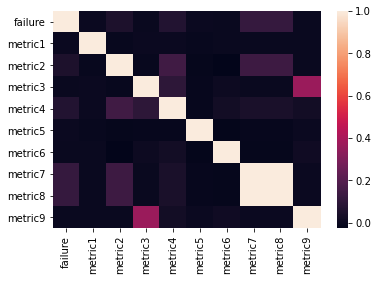

Dropping One of the columns of metric7, metric8 since they both are
having High Correlation

In \[8\]:

    df.drop(['metric8'],axis=1,inplace=True)

In \[9\]:

    duplicate = df[df.duplicated(keep=False)]
    duplicate
    df = df.drop_duplicates(keep='last')
    df.shape

Out\[9\]:

    (124493, 11)

Observing the distributions of Target class

In \[10\]:

    print(df['failure'].value_counts())
    import matplotlib.pyplot as plt
    count_classes = pd.value_counts(df['failure'], sort=True)
    count_classes.plot(kind = 'bar', rot=7)
    plt.title("Target Class Distribution")
    plt.xlabel("failure")
    plt.ylabel("count")

    0    124387
    1       106
    Name: failure, dtype: int64

Out\[10\]:

    Text(0, 0.5, 'count')

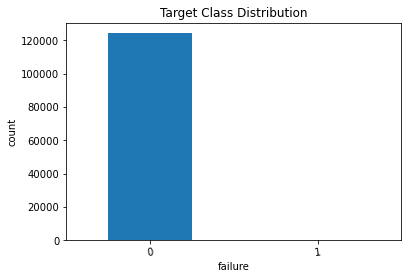

Observing the trend of daily entries

In \[11\]:

    daily_records = df['date'].value_counts()
    daily_records.plot()

Out\[11\]:

    <AxesSubplot:>

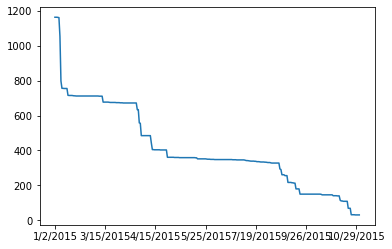

Extracting month column from the given date

In \[12\]:

    df['date'] = df['date'].astype('datetime64[ns]')
    df['month'] = pd.DatetimeIndex(df['date']).month
    # df['day_of_week'] = df['date'].dt.day_name()
    # df['dayofyear'] = df['date'].dt.dayofyear
    df.head()

Out\[12\]:

|     | date       | device   | failure | metric1   | metric2 | metric3 | metric4 | metric5 | metric6 | metric7 | metric9 | month |
|-----|------------|----------|---------|-----------|---------|---------|---------|---------|---------|---------|---------|-------|
| 0   | 2015-01-01 | S1F01085 | 0       | 215630672 | 55      | 0       | 52      | 6       | 407438  | 0       | 7       | 1     |
| 1   | 2015-01-01 | S1F0166B | 0       | 61370680  | 0       | 3       | 0       | 6       | 403174  | 0       | 0       | 1     |
| 2   | 2015-01-01 | S1F01E6Y | 0       | 173295968 | 0       | 0       | 0       | 12      | 237394  | 0       | 0       | 1     |
| 3   | 2015-01-01 | S1F01JE0 | 0       | 79694024  | 0       | 0       | 0       | 6       | 410186  | 0       | 0       | 1     |
| 4   | 2015-01-01 | S1F01R2B | 0       | 135970480 | 0       | 0       | 0       | 15      | 313173  | 0       | 3       | 1     |

In \[ \]:

     

Observing trend of Monthly records

In \[13\]:

    daily_records = df['month'].value_counts()
    daily_records.plot(kind = 'bar')

Out\[13\]:

    <AxesSubplot:>

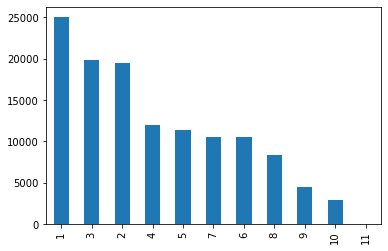

In \[14\]:

    import pandasql
    sub_data = pandasql.sqldf("SELECT device,count(*) as num_of_days_alive FROM df group by device order by num_of_days_alive desc;", globals())
    # print(sub_data)

In \[15\]:

    failure_data=pandasql.sqldf("SELECT * FROM df where failure=1;", globals())
    failure_data

Out\[15\]:

|     | date                       | device   | failure | metric1   | metric2 | metric3 | metric4 | metric5 | metric6 | metric7 | metric9 | month |
|-----|----------------------------|----------|---------|-----------|---------|---------|---------|---------|---------|---------|---------|-------|
| 0   | 2015-01-05 00:00:00.000000 | S1F0RRB1 | 1       | 48467332  | 64776   | 0       | 841     | 8       | 39267   | 56      | 1       | 1     |
| 1   | 2015-01-07 00:00:00.000000 | S1F0CTDN | 1       | 184069720 | 528     | 0       | 4       | 9       | 387871  | 32      | 3       | 1     |
| 2   | 2015-01-09 00:00:00.000000 | W1F0PNA5 | 1       | 136429411 | 64784   | 0       | 406     | 30      | 224801  | 8       | 0       | 1     |
| 3   | 2015-01-13 00:00:00.000000 | W1F13SRV | 1       | 188251248 | 2040    | 0       | 0       | 6       | 39345   | 32      | 1       | 1     |
| 4   | 2015-01-14 00:00:00.000000 | W1F1230J | 1       | 220461296 | 0       | 0       | 0       | 14      | 325125  | 0       | 0       | 1     |
| ... | ...                        | ...      | ...     | ...       | ...     | ...     | ...     | ...     | ...     | ...     | ...     | ...   |
| 101 | 2015-08-04 00:00:00.000000 | W1F1CB5E | 1       | 16043296  | 88      | 0       | 0       | 9       | 30      | 0       | 0       | 8     |
| 102 | 2015-08-18 00:00:00.000000 | Z1F0MRPJ | 1       | 65654088  | 0       | 0       | 0       | 9       | 298592  | 0       | 11      | 8     |
| 103 | 2015-10-05 00:00:00.000000 | S1F0JGJV | 1       | 13739704  | 0       | 0       | 18      | 8       | 343760  | 0       | 0       | 10    |
| 104 | 2015-10-09 00:00:00.000000 | Z1F14BGY | 1       | 85259320  | 0       | 0       | 164     | 8       | 262932  | 0       | 0       | 10    |
| 105 | 2015-10-26 00:00:00.000000 | W1F0T0B1 | 1       | 95073232  | 0       | 0       | 7       | 9       | 354861  | 22      | 0       | 10    |

106 rows × 12 columns

Observing the monthly failures

In \[16\]:

    viz=pandasql.sqldf("SELECT count(*) as num_of_failed,month FROM failure_data group by month order by num_of_failed desc ;", globals())
    print(viz)

       num_of_failed  month
    0             24      1
    1             21      5
    2             16      7
    3             14      2
    4              9      4
    5              9      3
    6              6      6
    7              4      8
    8              3     10

In \[ \]:

     

In \[17\]:

    # viz=pandasql.sqldf("SELECT count(*) as num_of_failed,month FROM failure_data group by month order by num_of_failed desc ;", globals())

In \[18\]:

    # df1=df.query("`failure` == 1")
    # #grouped=df1.groupby(['date','device'])
    # df1.head(106)

In \[19\]:

    df['device'].nunique()

Out\[19\]:

    1169

In \[20\]:

    y  = df['failure']
    y.value_counts()

Out\[20\]:

    0    124387
    1       106
    Name: failure, dtype: int64

In \[21\]:

    df

Out\[21\]:

|        | date       | device   | failure | metric1   | metric2 | metric3 | metric4 | metric5 | metric6 | metric7 | metric9 | month |
|--------|------------|----------|---------|-----------|---------|---------|---------|---------|---------|---------|---------|-------|
| 0      | 2015-01-01 | S1F01085 | 0       | 215630672 | 55      | 0       | 52      | 6       | 407438  | 0       | 7       | 1     |
| 1      | 2015-01-01 | S1F0166B | 0       | 61370680  | 0       | 3       | 0       | 6       | 403174  | 0       | 0       | 1     |
| 2      | 2015-01-01 | S1F01E6Y | 0       | 173295968 | 0       | 0       | 0       | 12      | 237394  | 0       | 0       | 1     |
| 3      | 2015-01-01 | S1F01JE0 | 0       | 79694024  | 0       | 0       | 0       | 6       | 410186  | 0       | 0       | 1     |
| 4      | 2015-01-01 | S1F01R2B | 0       | 135970480 | 0       | 0       | 0       | 15      | 313173  | 0       | 3       | 1     |
| ...    | ...        | ...      | ...     | ...       | ...     | ...     | ...     | ...     | ...     | ...     | ...     | ...   |
| 124489 | 2015-11-02 | Z1F0MA1S | 0       | 18310224  | 0       | 0       | 0       | 10      | 353705  | 8       | 0       | 11    |
| 124490 | 2015-11-02 | Z1F0Q8RT | 0       | 172556680 | 96      | 107     | 4       | 11      | 332792  | 0       | 13      | 11    |
| 124491 | 2015-11-02 | Z1F0QK05 | 0       | 19029120  | 4832    | 0       | 0       | 11      | 350410  | 0       | 0       | 11    |
| 124492 | 2015-11-02 | Z1F0QL3N | 0       | 226953408 | 0       | 0       | 0       | 12      | 358980  | 0       | 0       | 11    |
| 124493 | 2015-11-02 | Z1F0QLC1 | 0       | 17572840  | 0       | 0       | 0       | 10      | 351431  | 0       | 70000   | 11    |

124493 rows × 12 columns

In \[22\]:

    # pd.date_range(start = '2015-01-01', end = '2015-01-01' ).difference(df.index)

In \[23\]:

    df.drop(['failure','device','date'],axis=1,inplace=True)

In \[24\]:

    X = df 

In \[25\]:

    df.head(10)

Out\[25\]:

|     | metric1   | metric2 | metric3 | metric4 | metric5 | metric6 | metric7 | metric9 | month |
|-----|-----------|---------|---------|---------|---------|---------|---------|---------|-------|
| 0   | 215630672 | 55      | 0       | 52      | 6       | 407438  | 0       | 7       | 1     |
| 1   | 61370680  | 0       | 3       | 0       | 6       | 403174  | 0       | 0       | 1     |
| 2   | 173295968 | 0       | 0       | 0       | 12      | 237394  | 0       | 0       | 1     |
| 3   | 79694024  | 0       | 0       | 0       | 6       | 410186  | 0       | 0       | 1     |
| 4   | 135970480 | 0       | 0       | 0       | 15      | 313173  | 0       | 3       | 1     |
| 5   | 68837488  | 0       | 0       | 41      | 6       | 413535  | 0       | 1       | 1     |
| 6   | 227721632 | 0       | 0       | 0       | 8       | 402525  | 0       | 0       | 1     |
| 7   | 141503600 | 0       | 0       | 1       | 19      | 494462  | 16      | 3       | 1     |
| 8   | 8217840   | 0       | 1       | 0       | 14      | 311869  | 0       | 0       | 1     |
| 9   | 116440096 | 0       | 378     | 9       | 9       | 407905  | 0       | 170     | 1     |

Startified Split Splitting the data

In \[26\]:

    from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        stratify=y,
                                                        random_state=11)

In \[ \]:

     

In \[27\]:

    X_train['month'] = X_train['month'].astype("category")
    X_test['month'] = X_test['month'].astype("category")

    <ipython-input-27-536bbd704b12>:1: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      X_train['month'] = X_train['month'].astype("category")
    <ipython-input-27-536bbd704b12>:2: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      X_test['month'] = X_test['month'].astype("category")

Collecting all the numeraical and categorical features

In \[28\]:

    num_cols = X_train.select_dtypes(include=["number"]).columns.to_list()
    cat_cols = X_train.select_dtypes(exclude=["number"]).columns.to_list()

    cat_cols

Out\[28\]:

    ['month']

In \[29\]:

    for col in cat_cols:
        X_train[col] = X_train[col].astype("category")
        X_test[col] = X_test[col].astype("category")

    <ipython-input-29-66ee9e31654a>:2: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      X_train[col] = X_train[col].astype("category")
    <ipython-input-29-66ee9e31654a>:3: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      X_test[col] = X_test[col].astype("category")

In \[30\]:

    y_test.value_counts()

Out\[30\]:

    0    24878
    1       21
    Name: failure, dtype: int64

In \[31\]:

    print(f'Train datanshape: {X_train.shape}\nTest data shape : {X_test.shape}')

    Train datanshape: (99594, 9)
    Test data shape : (24899, 9)

Feature Engineering

In \[32\]:

    #numerical colums pipeline
    num_pipeline = Pipeline(
        [
                  ("std_scaler", StandardScaler()),
        ]
    )
    # categorical columns pipeline
    cat_pipeline = Pipeline(
        [
            ("one_hot_encoder", OneHotEncoder(sparse=False, handle_unknown="ignore")),
        ]
    )
    # full pipeline
    full_pipeline = ColumnTransformer(
        [("num", num_pipeline, num_cols), ("cat", cat_pipeline, cat_cols),]
    )

In \[33\]:

    X_train_LR = full_pipeline.fit_transform(X_train)
    X_test_LR = full_pipeline.transform(X_test)

Model Building:

1.  Modelling Pipeline for data preparation(Combination of oversampling
    and undersampling the data ), modelling operation
2.  CrossFold Validation
3.  Set Parameters for Grid Search
4.  Grid Search through predefined hyperparameters and fit model on your
    training set by selecting the best hyperparameters.

In \[34\]:

    # example of evaluating a decision tree with random oversampling
    from numpy import mean
    from sklearn.datasets import make_classification
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import RepeatedStratifiedKFold
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from imblearn.pipeline import Pipeline
    from imblearn.over_sampling import RandomOverSampler
    from imblearn.under_sampling import RandomUnderSampler

# Logistic Regression Classifier<a href="#Logistic-Regression-Classifier" class="anchor-link">¶</a>

In \[58\]:

    pipeline_lg = imbpipeline(steps=[['smote',SMOTE(random_state=11,
                                                 sampling_strategy=0.1)],
                                 ['under', RandomUnderSampler(sampling_strategy=0.5)], 
                                           ['classifier',LogisticRegression(C=1)]])
    stratified_kfold_lg = StratifiedKFold(n_splits=10,
                                      shuffle=True,
                                      random_state=11)
    # parameter for gridsearchcv
    param_grid_lg = {'classifier__C':[0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    # Gridsearch on parameter grid, use accuracy to determine the best model
    #finding best hyperparameter using gridsearchcv
    grid_search_lg = GridSearchCV(estimator=pipeline_lg,
                               param_grid = param_grid_lg,
                               scoring='accuracy',
                               cv=stratified_kfold_lg,
                               n_jobs=-1,
                              error_score="raise")

In \[59\]:

    cv = stratified_kfold_lg

    # evaluate model

    scores_lg = cross_val_score(pipeline_lg, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

    # summarize performance

    print('Mean ROC AUC: %.3f' % mean(scores_lg))

    Mean ROC AUC: 0.567

In \[37\]:

    # Fit model on the training data
    grid_search_lg.fit(X_train_LR, y_train)
    #taking the best cv score 
    cv_score_lg = grid_search_lg.best_score_
    train_score_lg = grid_search_lg.score(X_train_LR, y_train)
    #Evaluating the model accuracy using test_data
    test_score_lg = grid_search_lg.score(X_test_LR, y_test)
    y_pred_lg = grid_search_lg.predict(X_test_LR)
    print(f'Test score: {test_score_lg}\nTrain score: {train_score_lg}')
    print(f'\nConfusion matrix: \n{confusion_matrix(y_test, y_pred_lg)}')
    print(f'\n Classification report: \n{classification_report(y_test,y_pred_lg)}')

    Test score: 0.9905217076991044
    Train score: 0.9909733518083419

    Confusion matrix: 
    [[24654   224]
     [   12     9]]

     Classification report: 
                  precision    recall  f1-score   support

               0       1.00      0.99      1.00     24878
               1       0.04      0.43      0.07        21

        accuracy                           0.99     24899
       macro avg       0.52      0.71      0.53     24899
    weighted avg       1.00      0.99      0.99     24899

Random OverSampling

In \[61\]:

    pipeline_lg = imbpipeline(steps=[['over',RandomOverSampler(sampling_strategy=0.1)],
                                                 
                                 ['under', RandomUnderSampler(sampling_strategy=0.5)], 
                                           ['classifier',LogisticRegression(C=1)]])
    stratified_kfold_lg = StratifiedKFold(n_splits=10,
                                      shuffle=True,
                                      random_state=11)
    # parameter for gridsearchcv
    param_grid_lg = {'classifier__C':[0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    # Gridsearch on parameter grid, use accuracy to determine the best model
    #finding best hyperparameter using gridsearchcv
    grid_search_lg = GridSearchCV(estimator=pipeline_lg,
                               param_grid = param_grid_lg,
                               scoring='accuracy',
                               cv=stratified_kfold_lg,
                               n_jobs=-1,
                              error_score="raise")

In \[ \]:

     

In \[62\]:

    # Fit model on the training data
    grid_search_lg.fit(X_train_LR, y_train)
    #taking the best cv score 
    cv_score_lg = grid_search_lg.best_score_
    train_score_lg = grid_search_lg.score(X_train_LR, y_train)
    #Evaluating the model accuracy using test_data
    test_score_lg = grid_search_lg.score(X_test_LR, y_test)
    y_pred_lg = grid_search_lg.predict(X_test_LR)
    print(f'Test score: {test_score_lg}\nTrain score: {train_score_lg}')
    print(f'\nConfusion matrix: \n{confusion_matrix(y_test, y_pred_lg)}')
    print(f'\n Classification report: \n{classification_report(y_test,y_pred_lg)}')

    Test score: 0.9904413831880798
    Train score: 0.990923147980802

    Confusion matrix: 
    [[24652   226]
     [   12     9]]

     Classification report: 
                  precision    recall  f1-score   support

               0       1.00      0.99      1.00     24878
               1       0.04      0.43      0.07        21

        accuracy                           0.99     24899
       macro avg       0.52      0.71      0.53     24899
    weighted avg       1.00      0.99      0.99     24899

SMOTETOMEK

In \[66\]:

    from imblearn.combine import SMOTETomek
    pipeline_lg = imbpipeline(steps=[['smote',SMOTETomek(random_state=11,
                                                 sampling_strategy=0.1)],
                                 ['under', RandomUnderSampler(sampling_strategy=0.5)], 
                                           ['classifier',LogisticRegression(C=1)]])
    stratified_kfold_lg = StratifiedKFold(n_splits=10,
                                      shuffle=True,
                                      random_state=11)
    # parameter for gridsearchcv
    param_grid_lg = {'classifier__C':[0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    # Gridsearch on parameter grid, use accuracy to determine the best model
    #finding best hyperparameter using gridsearchcv
    grid_search_lg = GridSearchCV(estimator=pipeline_lg,
                               param_grid = param_grid_lg,
                               scoring='accuracy',
                               cv=stratified_kfold_lg,
                               n_jobs=-1,
                              error_score="raise")

In \[ \]:

    # Fit model on the training data
    grid_search_lg.fit(X_train_LR, y_train)
    #taking the best cv score 
    cv_score_lg = grid_search_lg.best_score_
    train_score_lg = grid_search_lg.score(X_train_LR, y_train)
    #Evaluating the model accuracy using test_data
    test_score_lg = grid_search_lg.score(X_test_LR, y_test)
    y_pred_lg = grid_search_lg.predict(X_test_LR)
    print(f'Test score: {test_score_lg}\nTrain score: {train_score_lg}')
    print(f'\nConfusion matrix: \n{confusion_matrix(y_test, y_pred_lg)}')
    print(f'\n Classification report: \n{classification_report(y_test,y_pred_lg)}')

# Random Forest Classifier<a href="#Random-Forest-Classifier" class="anchor-link">¶</a>

In \[38\]:

    pipeline_rfc = imbpipeline(steps=[['smote',SMOTE(random_state=11,
                                                 sampling_strategy=0.1)],
                                 ['under', RandomUnderSampler(sampling_strategy=0.5)], 
                                  ['classifier', RandomForestClassifier(random_state=11, n_estimators=200)]])
    stratified_kfold_rfc = StratifiedKFold(n_splits=10,
                                      shuffle=True,
                                      random_state=11)
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 100)]
    # Hyperparameter tuning grid
    random_grid = {'classifier__n_estimators': n_estimators
                  }
    # Gridsearch on parameter grid, use accuracy to determine the best model
    grid_search_rfc = GridSearchCV(estimator=pipeline_rfc,
                       
                               param_grid =random_grid,
                               scoring='accuracy',
                               cv=stratified_kfold_rfc,
                               n_jobs=-1,
                              error_score="raise")

In \[39\]:

    cv = stratified_kfold_rfc

    # evaluate model

    scores_rfc = cross_val_score(pipeline_rfc, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

    # summarize performance

    print('Mean ROC AUC: %.3f' % mean(scores_rfc))

    Mean ROC AUC: 0.872

In \[40\]:

    # Fit model on the training data
    grid_search_rfc.fit(X_train_LR, y_train)
    #taking the best cv score 
    cv_score_rfc = grid_search_rfc.best_score_
    train_score_rfc = grid_search_rfc.score(X_train_LR, y_train)
    #Evaluating the model accuracy using test_data
    test_score_rfc = grid_search_rfc.score(X_test_LR, y_test)
    y_pred_rfc = grid_search_rfc.predict(X_test_LR)
    print(f'Test score: {test_score_rfc}\nTrain score: {train_score_rfc}')
    print(f'\nConfusion matrix: \n{confusion_matrix(y_test, y_pred_rfc)}')
    print(f'\n Classification report: \n{classification_report(y_test,y_pred_rfc)}')

    Test score: 0.9975501024137515
    Train score: 0.9987348635459967

    Confusion matrix: 
    [[24837    41]
     [   20     1]]

     Classification report: 
                  precision    recall  f1-score   support

               0       1.00      1.00      1.00     24878
               1       0.02      0.05      0.03        21

        accuracy                           1.00     24899
       macro avg       0.51      0.52      0.52     24899
    weighted avg       1.00      1.00      1.00     24899

# XGBoost Classifier<a href="#XGBoost-Classifier" class="anchor-link">¶</a>

In \[41\]:

    from xgboost import XGBClassifier
    #Building the pipeline with preprocessing steps and model definition
    pipeline_xgb = imbpipeline(steps = [['smote',SMOTE(random_state=11,
                                                 sampling_strategy=0.1)],
                                 ['under', RandomUnderSampler(sampling_strategy=0.5)], 
                                    ['classifier', XGBClassifier(n_jobs=-1,grow_policy='lossguide',tree_method ='hist',n_estimators=100)]])

    #Using the stratified_kfold method for K- Fold cross validation to avaoid over-fitting
    stratified_kfold_xgb = StratifiedKFold(n_splits=10,
                                           shuffle=True,
                                           random_state=11)
    # Hyperparameter tuning grid
    XGB_param_grid = {'classifier__min_child_weight': [1, 5, 10],'classifier__gamma': [0.5, 1, 1.5, 2, 5],'classifier__subsample': [0.6, 0.8, 1.0],'classifier__max_depth': [3, 4, 5]}

    # A parameter grid for XGBoostparams = {'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5],'subsample': [0.6, 0.8, 1.0],'colsample_bytree': [0.6, 0.8, 1.0],'max_depth': [3, 4, 5]}
    # Gridsearch on parameter grid, use accuracy to determine the best model
    XGB_grid_search = GridSearchCV(estimator=pipeline_xgb,
                               param_grid = XGB_param_grid,
                               scoring='accuracy',
                               cv=stratified_kfold_xgb,
                               n_jobs=-1,
                              error_score="raise")

In \[42\]:

    cv = stratified_kfold_xgb

    # evaluate model

    scores_xgb = cross_val_score(pipeline_xgb, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

    # summarize performance

    print('Mean ROC AUC: %.3f' % mean(scores_xgb))

    Mean ROC AUC: 0.867

In \[43\]:

    # Fit model on the training data
    XGB_grid_search.fit(X_train_LR, y_train)
    #taking the best cv score 
    cv_score = XGB_grid_search.best_score_
    train_score_xgb = XGB_grid_search.score(X_train_LR, y_train)
    #Evaluating the model accuracy using test_data
    test_score_xgb = XGB_grid_search.score(X_test_LR, y_test)
    y_pred_XGBC = XGB_grid_search.predict(X_test_LR)
    print(f'Test score: {test_score_xgb}\nTrain score: {train_score_xgb}')
    print(f'\n Confusion matrix: \n{confusion_matrix(y_test, y_pred_XGBC)}')
    print(f'\n Classification report: \n{classification_report(y_test,y_pred_XGBC)}')

    C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
      warnings.warn(label_encoder_deprecation_msg, UserWarning)

    [21:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    Test score: 0.9969476685810675
    Train score: 0.997580175512581

     Confusion matrix: 
    [[24819    59]
     [   17     4]]

     Classification report: 
                  precision    recall  f1-score   support

               0       1.00      1.00      1.00     24878
               1       0.06      0.19      0.10        21

        accuracy                           1.00     24899
       macro avg       0.53      0.59      0.55     24899
    weighted avg       1.00      1.00      1.00     24899

Smotetomek

# LGB Classifier<a href="#LGB-Classifier" class="anchor-link">¶</a>

In \[53\]:

    import lightgbm as lgb

    #Building the pipeline with preprocessing steps and model definition
    pipeline_lgb = imbpipeline(steps = [['smote',SMOTE(random_state=11,
                                                 sampling_strategy=0.1)],
                                 ['under', RandomUnderSampler(sampling_strategy=0.5)], 
                                    ['classifier', lgb.LGBMClassifier(boosting_type='gbdt',  
                            objective='binary', num_boost_round=2000, learning_rate=0.01, metric='auc')]])
    #Using the stratified_kfold method for K- Fold cross validation to avaoid over-fitting
    stratified_kfold_lgb = StratifiedKFold(n_splits=10,
                                           shuffle=True,
                                           random_state=11)
    # Hyperparameter tuning grid
    param_grid_lgb = {
        'classifier__num_leaves': [31, 127],
        'classifier__reg_alpha': [0.1, 0.5],
        'classifier__min_data_in_leaf': [30, 50, 100, 300, 400],
        'classifier__lambda_l1': [0, 1, 1.5],
        'classifier__lambda_l2': [0, 1]
        }

    #  'lambda_l1': [0, 1, 1.5], A parameter grid for XGBoostparams = {'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5],'subsample': [0.6, 0.8, 1.0],'colsample_bytree': [0.6, 0.8, 1.0],'max_depth': [3, 4, 5]}
    # Gridsearch on parameter grid, use accuracy to determine the best model
    LGB_grid_search = GridSearchCV(estimator=pipeline_lgb,
                               param_grid = param_grid_lgb,
                               scoring='accuracy',
                               cv=stratified_kfold_lgb,
                               n_jobs=-1,
                              error_score="raise")

In \[54\]:

    cv = stratified_kfold_lgb

    # evaluate model

    scores_lgb = cross_val_score(pipeline_lgb, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

    # summarize performance

    print('Mean ROC AUC: %.3f' % mean(scores_lgb))

    Mean ROC AUC: 0.858

In \[55\]:

    # Fit model on the training data
    LGB_grid_search.fit(X_train_LR, y_train)
    #taking the best cv score 
    cv_score =LGB_grid_search.best_score_
    train_score = LGB_grid_search.score(X_train_LR, y_train)
    #Evaluating the model accuracy using test_data
    test_score = LGB_grid_search.score(X_test_LR, y_test)
    y_pred_LGBC = LGB_grid_search.predict(X_test_LR)
    print(f'Test score: {test_score}\nTrain score: {train_score}')
    print(f'\n Confusion matrix: \n{confusion_matrix(y_test, y_pred_LGBC)}')
    print(f'\n Classification report: \n{classification_report(y_test,y_pred_LGBC)}')

    C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
      _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

    [LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
    [LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
    [LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
    [LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
    Test score: 0.9980320494798988
    Train score: 0.99891559732514

     Confusion matrix: 
    [[24847    31]
     [   18     3]]

     Classification report: 
                  precision    recall  f1-score   support

               0       1.00      1.00      1.00     24878
               1       0.09      0.14      0.11        21

        accuracy                           1.00     24899
       macro avg       0.54      0.57      0.55     24899
    weighted avg       1.00      1.00      1.00     24899

# Decision Tree Classifier<a href="#Decision-Tree-Classifier" class="anchor-link">¶</a>

In \[47\]:

    pipeline_dt = imbpipeline(steps=[['smote',SMOTE(random_state=11,
                                                 sampling_strategy=0.1)],
                                 ['under', RandomUnderSampler(sampling_strategy=0.5)], 
                                  ['classifier', RandomForestClassifier(random_state=100, n_estimators=200)]])
    stratified_kfold_dt = StratifiedKFold(n_splits=10,
                                      shuffle=True,
                                      random_state=11)
    n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 100)]
    # Hyperparameter tuning grid
    random_grid = {'classifier__n_estimators': n_estimators
                  }
    # Gridsearch on parameter grid, use accuracy to determine the best model
    grid_search_dt = GridSearchCV(estimator=pipeline_rfc,
                       
                               param_grid =random_grid,
                               scoring='accuracy',
                               cv=stratified_kfold_rfc,
                               n_jobs=-1,
                              error_score="raise")

In \[48\]:

    cv = stratified_kfold_dt

    # evaluate model

    scores_dt = cross_val_score(pipeline_dt, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

    # summarize performance

    print('Mean ROC AUC: %.3f' % mean(scores_dt))

    Mean ROC AUC: 0.864

In \[49\]:

    # Fit model on the training data
    grid_search_dt.fit(X_train_LR, y_train)
    #taking the best cv score 
    cv_score_dt = grid_search_dt.best_score_
    train_score_dt = grid_search_dt.score(X_train_LR, y_train)
    #Evaluating the model accuracy using test_data
    test_score_dt = grid_search_dt.score(X_test_LR, y_test)
    y_pred_dt = grid_search_dt.predict(X_test_LR)
    print(f'Test score: {test_score_dt}\nTrain score: {train_score_dt}')
    print(f'\nConfusion matrix: \n{confusion_matrix(y_test, y_pred_dt)}')
    print(f'\n Classification report: \n{classification_report(y_test,y_pred_dt)}')

    Test score: 0.9978312382023374
    Train score: 0.9986244151254091

    Confusion matrix: 
    [[24844    34]
     [   20     1]]

     Classification report: 
                  precision    recall  f1-score   support

               0       1.00      1.00      1.00     24878
               1       0.03      0.05      0.04        21

        accuracy                           1.00     24899
       macro avg       0.51      0.52      0.52     24899
    weighted avg       1.00      1.00      1.00     24899

In \[63\]:

    pipeline_dt = imbpipeline(steps=[['over',RandomOverSampler(random_state=11,
                                                 sampling_strategy=0.1)],
                                 ['under', RandomUnderSampler(sampling_strategy=0.5)], 
                                  ['classifier', RandomForestClassifier(random_state=100, n_estimators=200)]])
    stratified_kfold_dt = StratifiedKFold(n_splits=10,
                                      shuffle=True,
                                      random_state=11)
    n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 100)]
    # Hyperparameter tuning grid
    random_grid = {'classifier__n_estimators': n_estimators
                  }
    # Gridsearch on parameter grid, use accuracy to determine the best model
    grid_search_dt = GridSearchCV(estimator=pipeline_rfc,
                       
                               param_grid =random_grid,
                               scoring='accuracy',
                               cv=stratified_kfold_rfc,
                               n_jobs=-1,
                              error_score="raise")

In \[ \]:

    # Fit model on the training data
    grid_search_dt.fit(X_train_LR, y_train)
    #taking the best cv score 
    cv_score_dt = grid_search_dt.best_score_
    train_score_dt = grid_search_dt.score(X_train_LR, y_train)
    #Evaluating the model accuracy using test_data
    test_score_dt = grid_search_dt.score(X_test_LR, y_test)
    y_pred_dt = grid_search_dt.predict(X_test_LR)
    print(f'Test score: {test_score_dt}\nTrain score: {train_score_dt}')
    print(f'\nConfusion matrix: \n{confusion_matrix(y_test, y_pred_dt)}')
    print(f'\n Classification report: \n{classification_report(y_test,y_pred_dt)}')

In \[ \]: